#Introduction to regression with neural networks :
Predicting numerical variables based on some other combination of variables 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


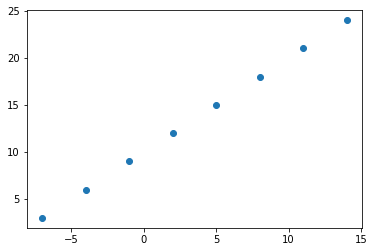

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,Y)

In [ ]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#Create a demo tensor for our housing price prediction problem 
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant('939700')
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'939700'>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

((), ())

In [ ]:
#Turn the numpy array into tensors
X = tf.constant(X)
Y = tf.constant(Y)
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

Steps in modelling with tensorflow
1. Create a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compile a model - define a loss function(a function that tells the model how wrong it is), optimizer (tells our model how to improve the pattern learnings) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting a model try to find patterns between X and Y or features and labels!

In [ ]:
tf.random.set_seed(42)

#Create the model using sequential API
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
]) #can also use the add method to add things to the sequntial model!!

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])


#Fit the model 
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)



Epoch 1/100
1/1 [==============================] - 1s 654ms/step - loss: 13.9190 - mae: 13.9190
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8510 - mae: 13.8510
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7832 - mae: 13.7832
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7153 - mae: 13.7153
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.6475 - mae: 13.6475
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5797 - mae: 13.5797
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5119 - mae: 13.5119
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4441 - mae: 13.4441
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3764 - mae: 13.3764
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3086 - mae: 13.3086
Epoch 11/100
1/1 [==============================

In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Try and make prediction with our model 
model.predict([17.0])

1/1 [==============================] - 0s 80ms/step


array([[30.504622]], dtype=float32)

#Improving the model 
We can improve our model by altering the steps we took to create a model.
1. Create a model - we might add more layers, increase the number of hidden layers,  change the activation fuction of the layer
2. Compiling a model - change the optimization function, learning rate of the optimization function
3. Fitting a moel - give the model more data or increase the number of times it can go over it!

In [ ]:
#Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

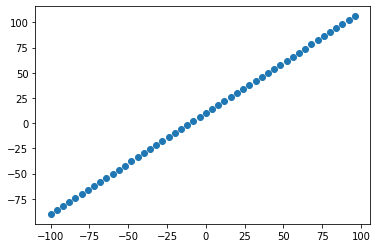

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

#The 3 sets: 
1. Training set - the model learns from this(70-80% of the whole data)
2. Validation set - the model gets tuned on this data, (10-15% of the data)
3. Test set - The model gets evaluated on this data (10-15% of the data)

In [ ]:
# Check the length of how many samples we have 
len(X)

50

In [ ]:
# Split the data into train and test sets 
X_train = X[:40] #First 40 samples
Y_train = Y[:40]
X_test = X[40:] #Last 10 samples
Y_test = Y[40:]
len(X_test),len(X_train), len(Y_test),len(Y_train)

(10, 40, 10, 40)

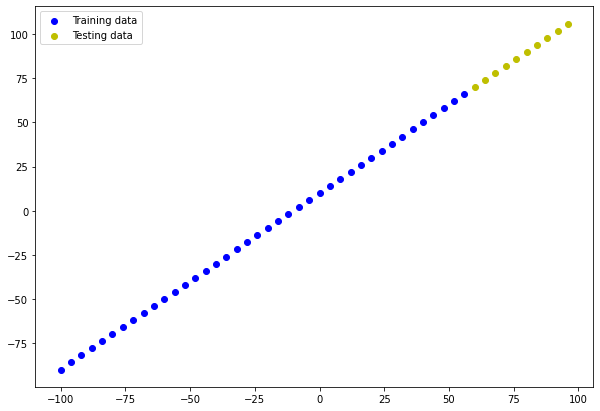

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, c="b", label="Training data")
plt.scatter(X_test,Y_test, c="y", label="Testing data")
plt.legend()

In [ ]:
#Building a neural network of this data set!!

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

#2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params: total number of parameters in the model 
Trainable params: parameters the model can update as it trains
Non-Trainable params - ask Nishant

In [ ]:
model.fit(X_train,Y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 36.2215 - mae: 36.2215
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.1459 - mae: 26.1459
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 31.6697 - mae: 31.6697
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 26.0142 - mae: 26.0142
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 14.2840 - mae: 14.2840
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 11.4125 - mae: 11.4125
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4431 - mae: 12.4431
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.9639 - mae: 10.9639
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 38.9157 - mae: 38.9157
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 26.5104 - mae: 26.5104
Epoch 11/100
2/2 [==============================] 

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 from tensorflow.keras.utils import plot_model

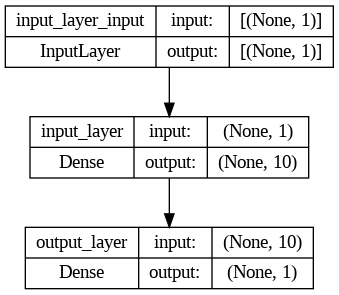

In [ ]:
 plot_model(model = model, show_shapes=True)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 78.322945],
       [ 83.425865],
       [ 88.528786],
       [ 93.6317  ],
       [ 98.73461 ],
       [103.83753 ],
       [108.940445],
       [114.04336 ],
       [119.14628 ],
       [124.2492  ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions =  Y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="tesing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()

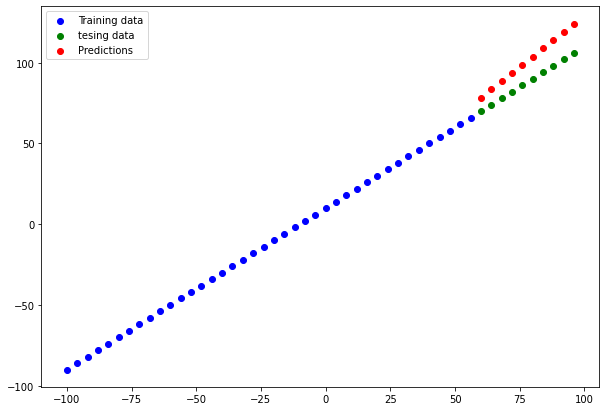

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data = X_test,
                 test_labels = Y_test,
                 predictions= Y_pred)

Evaluating our model's predictions with regression evaluation metrics.
Depending on the problem, there will be different evaluation metrics to evaluate your model's performance. 
MAE - Mean absolute error - on average how wroong is each of my model's predictions
MSE - mean square error - square the average errors
MAE formula: Sum of all (ys(labels) - xs(predictions))/n
MSE formula: sum of all ((ys(labels) - y_pred)^2)/n

In [ ]:
#Evaluate the model in test_set 
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 120ms/step - loss: 13.2861 - mae: 13.2861


[13.286069869995117, 13.286069869995117]

Calculate MAE

In [ ]:
Y_pred = tf.constant(Y_pred)
Y_pred = tf.squeeze(Y_pred)


In [ ]:
tf.metrics.mean_absolute_error(y_pred=Y_pred,
                               y_true=Y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=13.286072>

In [ ]:
tf.metrics.mean_squared_error(y_true=Y_test,
                              y_pred=Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=186.5552>

In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)

#Tweaking the model!!!
3 models: 
1. model_1 = same as original
2. model_2 = 2 layers 100 epochs
3. model_3 = 2 layers 500 epochs

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
model_1.fit(tf.expand_dims(X_train, axis = -1),Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 17.6381 - mae: 17.6381
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 17.5621 - mae: 17.5621
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 17.4915 - mae: 17.4915
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 17.4204 - mae: 17.4204
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 17.3499 - mae: 17.3499
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 17.2783 - mae: 17.2783
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 17.2057 - mae: 17.2057
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 17.1308 - mae: 17.1308
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 17.0641 - mae: 17.0641
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 16.9949 - mae: 16.9949
Epoch 11/100
2/2 [==============================] - 0s 5ms

1/1 [==============================] - 0s 41ms/step


(10, 1)

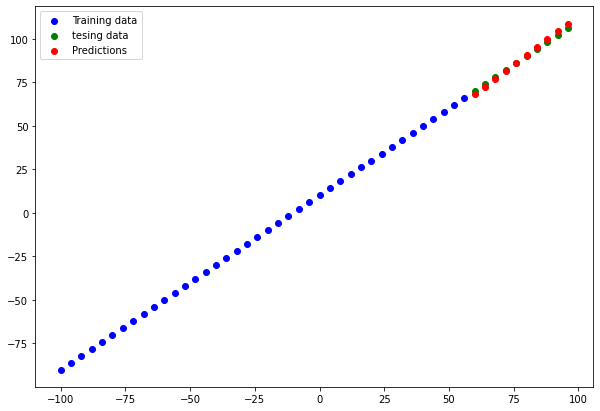

In [ ]:
Y_pred1 = model_1.predict(X_test)
# X_test.shape
plot_predictions(predictions= Y_pred1)
Y_pred1 = tf.squeeze(Y_pred1)


In [ ]:
#Calculating the mae (model_1 evaluation metrics)
mae_1 = mae(Y_test,Y_pred1)
mse_1 = mse(Y_test,Y_pred1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3025398>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.3008335>)

In [ ]:
#Build model 2 
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])
model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 70.4833 - mse: 7486.6470
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 22.4866 - mse: 792.0527
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 17.4812 - mse: 440.7849
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.6331 - mse: 278.6840
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 17.1355 - mse: 393.0700
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0702 - mse: 118.5633
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0213 - mse: 147.2220
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0542 - mse: 152.0844
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.7791 - mse: 2482.3738
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2587 - mse: 1045.6472
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 157ms/step


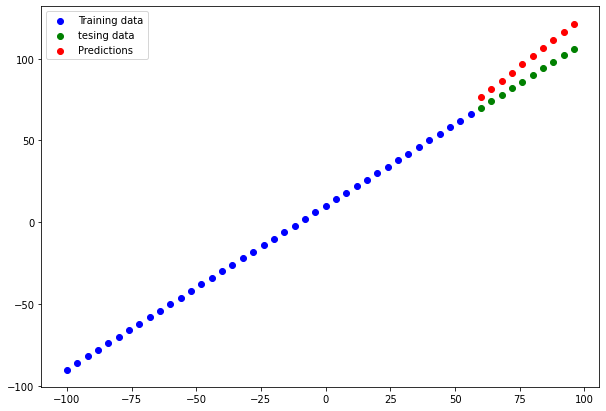

In [ ]:
Y_pred2 = model_2.predict(X_test)
plot_predictions(predictions = Y_pred2)
Y_pred2 = tf.squeeze(Y_pred2)
# Y_pred2.shape,X_train.shape,X_test.shape


In [ ]:
mae_2 = mae(Y_test,Y_pred2)
mse_2 = mse(Y_test,Y_pred2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.004115>,
 <tf.Tensor: shape=(), dtype=float32, numpy=129.1551>)

In [ ]:
#Build model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 33.7170 - mae: 33.7170
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 27.9725 - mae: 27.9725
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 31.2117 - mae: 31.2117
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 16.3005 - mae: 16.3005
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 21.8371 - mae: 21.8371
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 12.0744 - mae: 12.0744
Epoch 7/500
2/2 [==============================] - 0s 23ms/step - loss: 13.2380 - mae: 13.2380
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.2875 - mae: 11.2875
Epoch 9/500
2/2 [==============================] - 0s 19ms/step - loss: 42.2673 - mae: 42.2673
Epoch 10/500
2/2 [==============================] - 0s 15ms/step - loss: 29.4308 - mae: 29.4308
Epoch 11/500
2/2 [==============================] 

1/1 [==============================] - 0s 120ms/step


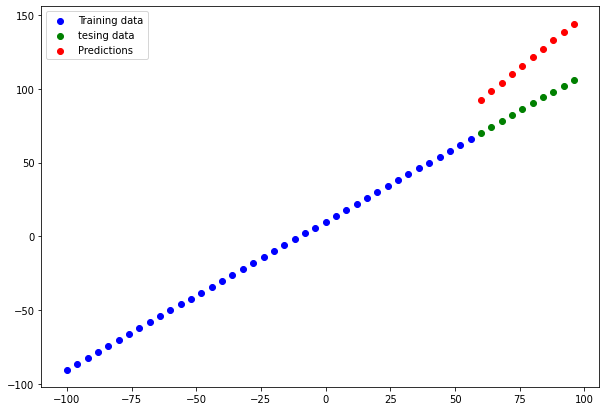

In [ ]:
Y_pred3 = model_3.predict(X_test)
plot_predictions(predictions = Y_pred3)
Y_pred3= tf.squeeze(Y_pred3)

In [ ]:
mae_3 = mae(Y_test,Y_pred3)
mse_3 = mse(Y_test,Y_pred3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=30.261555>,
 <tf.Tensor: shape=(), dtype=float32, numpy=940.17596>)

In [ ]:
#Let'scompare the model's results using a pandas dataframe

import pandas as pd 
model_results = [["model_1", mae_1.numpy(),mse_2.numpy()],
                 ["model_2", mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model","Mae","Mse"])
all_results

,model,Mae,Mse
0,model_1,1.302540,129.155106
1,model_2,11.004115,129.155106
2,model_3,30.261555,940.175964


In [ ]:
model_1.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Same the model using the SavedModel format 
model_1.save("Model_1_SavedModel_format")

In [ ]:
#Save the model using the HDF5 format
model_1.save("Model_1_HDF5_format")

In [ ]:
#LOading in the saved model!!
loaded_SavedModel_format= tf.keras.models.load_model("Model_1_HDF5_format")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1_pred = model_1.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_1_pred== loaded_SavedModel_format_pred

1/1 [==============================] - 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt 

#Reading the csv file

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Cleaning the data: changing the data type of the non-numerical columns to numerical columns 
#Spliting the sex column into female_sex, male_sex and putting 1 or 0 accorodingly)
#One hot encoded!!!!
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
#Create X&Y values(features and labels)
X = insurance_onehot.drop("charges",axis=1)
Y = insurance_onehot["charges"]
X,Y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)
len(X), len(X_train),len(X_test), len(Y),len(Y_train),len(Y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

insurance_model.fit(X_train,Y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8772.5850 - mae: 8772.5850
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7882.7412 - mae: 7882.7412
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7552.3813 - mae: 7552.3813
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7727.3462 - mae: 7727.3462
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7826.5137 - mae: 7826.5137
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7566.0874 - mae: 7566.0874
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7553.1006 - mae: 7553.1006
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7827.9727 - mae: 7827.9727
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7491.3643 - mae: 7491.3643
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7762.8730 - mae: 7762.8730

In [ ]:
#Check th results (predict it)
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7696.7900 - mae: 7696.7900


[7696.7900390625, 7696.7900390625]

In [ ]:
tf.random.set_seed(42)
insurance_model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

insurance_model_1.fit(X_train,Y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13314.2676 - mae: 13314.2676
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13260.2285 - mae: 13260.2285
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13185.8359 - mae: 13185.8359
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13080.1787 - mae: 13080.1787
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 12935.5723 - mae: 12935.5723
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12746.2441 - mae: 12746.2441
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12510.1104 - mae: 12510.1104
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12225.2500 - mae: 12225.2500
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 11891.7783 - mae: 11891.7783
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11517.81

In [ ]:
insurance_model_1.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 5ms/step - loss: 6748.0132 - mae: 6748.0132


[6748.01318359375, 6748.01318359375]

In [ ]:
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

history = insurance_model_2.fit(X_train,Y_train,epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13320.7236 - mae: 13320.7236
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13267.0049 - mae: 13267.0049
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13199.0098 - mae: 13199.0098
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13105.1201 - mae: 13105.1201
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12975.7637 - mae: 12975.7637
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 12803.3447 - mae: 12803.3447
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 12583.6680 - mae: 12583.6680
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 12313.6055 - mae: 12313.6055
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 11991.5928 - mae: 11991.5928
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 11623.08

In [ ]:
insurance_model_2.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 6ms/step - loss: 6021.5830 - mae: 6021.5830


[6021.5830078125, 6021.5830078125]

In [ ]:
insurance_model_1.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 5ms/step - loss: 6748.0132 - mae: 6748.0132


[6748.01318359375, 6748.01318359375]

In [ ]:
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7696.7900 - mae: 7696.7900


[7696.7900390625, 7696.7900390625]

Text(0.5, 0, 'mae')

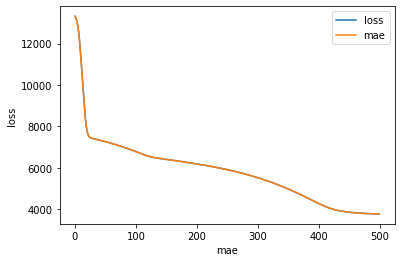

In [ ]:
#Plotting the loss function 
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("mae")

In [ ]:
#Preprocessing data!!!
#Normalization and Standardization 

#To prepare our data, we can borrow a few classes from scikit 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transofrmer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker",'region'])
)

# Create X and Y
X = insurance.drop("charges",axis=1)
Y = insurance["charges"]

# Build our train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

# Fit the column transformer to out trainig data
ct.fit(X_train)

#Transform training and test data with normalization 
X_train_normal= ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#Build the model 
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

insurance_model_4.fit(X_train_normal, Y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.3926 - mae: 13344.3926
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.4023 - mae: 13336.4023
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13316.3936 - mae: 13316.3936
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.4766 - mae: 13273.4766
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13196.1768 - mae: 13196.1768
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13073.3584 - mae: 13073.3584
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12894.5332 - mae: 12894.5332
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12649.4316 - mae: 12649.4316
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12327.8672 - mae: 12327.8672
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.02

In [ ]:
#Extra - curricular Exercise!!!!

In [ ]:
import tensorflow as tf
X = tf.constant([ 5, 4, 3, 2, 1, 0, -1, -2, -3, -4,-5])
Y = tf.constant([15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5])

X,Y

(<tf.Tensor: shape=(11,), dtype=int32, numpy=array([ 5,  4,  3,  2,  1,  0, -1, -2, -3, -4, -5], dtype=int32)>,
 <tf.Tensor: shape=(11,), dtype=int32, numpy=array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5], dtype=int32)>)

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
X_train = X[:8]
X_test = X[8:]
Y_train = Y[:8]
Y_test = Y[8:]
len(X), len(X_train),len(X_test), len(Y),len(Y_train),len(Y_test)

(11, 8, 3, 11, 8, 3)

In [ ]:
#Create a model!!
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(tf.expand_dims(X_train,axis = 1),Y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 10.2387 - mae: 10.2387
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7550 - mae: 9.7550
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2298 - mae: 9.2298
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6486 - mae: 8.6486
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9940 - mae: 7.9940
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2438 - mae: 7.2438
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.4261 - mae: 6.4261
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3015 - mae: 6.3015
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.1701 - mae: 6.1701
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0546 - mae: 6.0546
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - lo

In [ ]:
import pandas as pd
tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)


57026/57026 [==============================] - 0s 0us/step


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.